#Sistemes d'Aprenentatge Automàtic. Lliurament 3.
#**Regressió**

En aquest quadern trobareu els gràfics i codi inclòs als apunts, i us servira de referència per al desenvolupament de la tasca.

In [ ]:
import pandas as pd  # doctest: +SKIP
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"

df = pd.read_csv(data_url, sep="\s+", engine='python', skiprows=22, header=None)
print(df.size)

data=np.hstack([df.values[::2,0:11], df.values[1::2,0:3]])

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B', 'LSTAT', 'MEDV']

df=pd.DataFrame(data,columns=columns)

df.head()

11132


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#Visualització de les característiques importants d'un conjunt de dades

In [ ]:
!pip install mlxtend

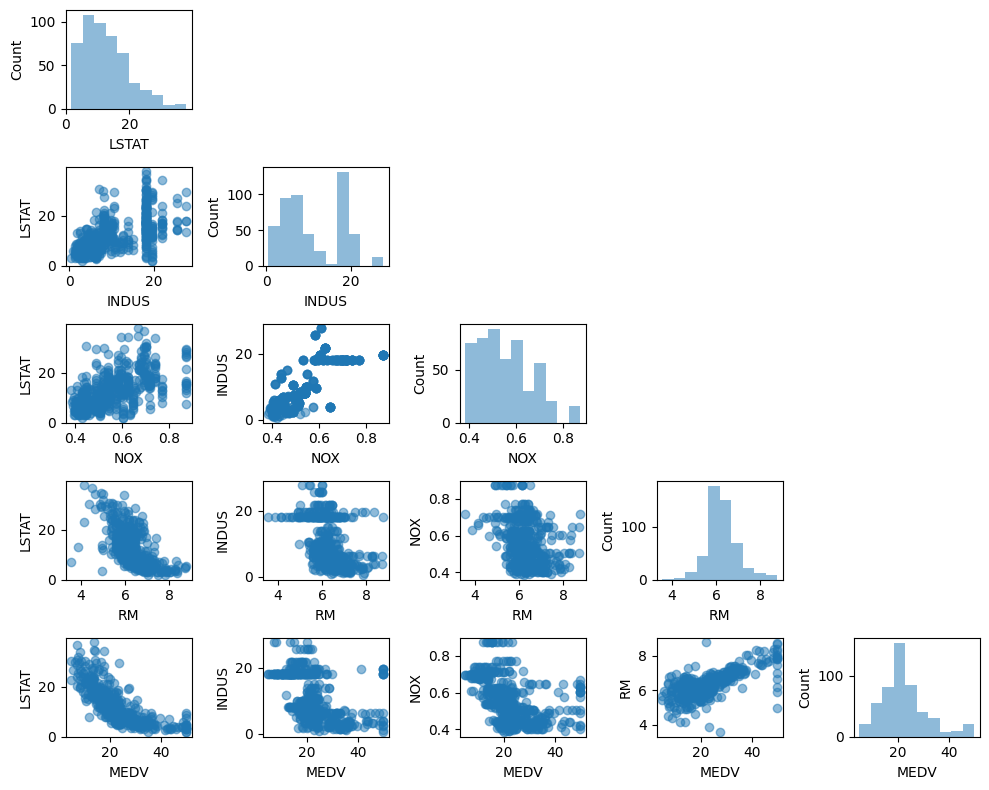

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols=['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10,8), names=cols, alpha=0.5)

plt.tight_layout()
plt.show()

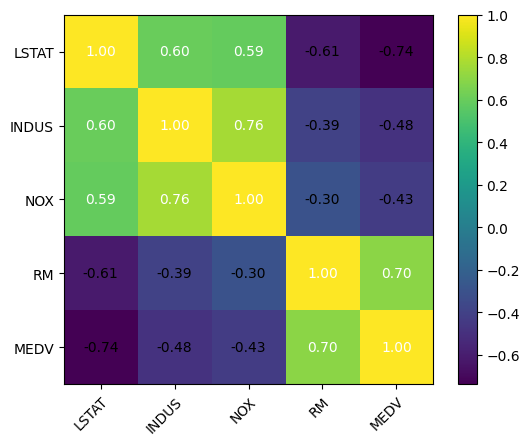

In [ ]:
from mlxtend.plotting import heatmap

cm = np.corrcoef(df[cols].values.T)

hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

In [ ]:
class LinearRegressionGD(object):

  def __init__(self, eta=0.001, n_iter=20):
    self.eta = eta
    self.n_iter = n_iter

  def fit(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      output = self.predict(X)
      errors = (y-output)
      self.w_[1:] += self.eta * X.T.dot(errors)
          # mirar si es pot posat np.dot(X.T, errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def predict(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

In [ ]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

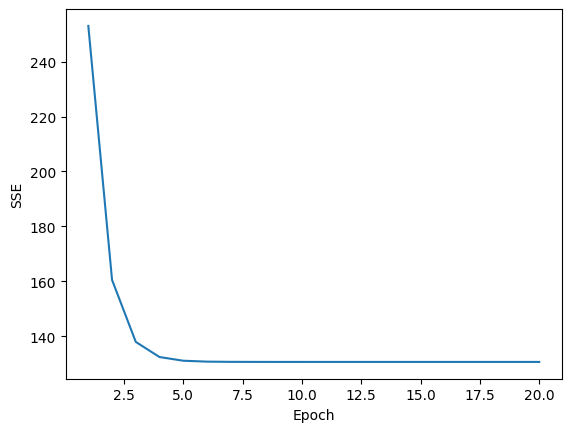

In [ ]:
plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [ ]:
def lin_regplot(X, y, model):
  plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
  plt.plot(X, model.predict(X), color='black', linewidth=2)

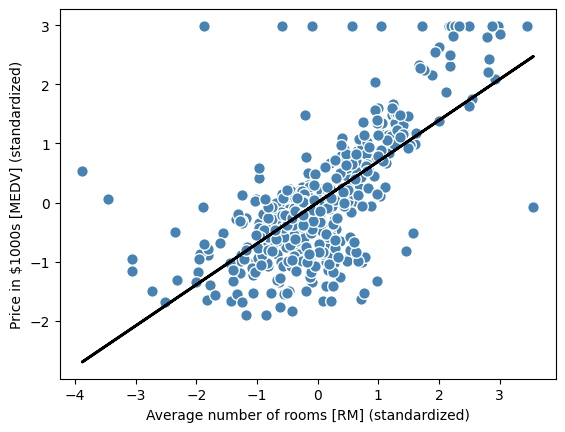

In [ ]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [ ]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
'''
print("Price in $1000s: %.3f" % \
      sc_y.inverse_transform(price_std))
'''

print("Price in $1000s: %.3f" % sc_y.inverse_transform([price_std]))

Price in $1000s: 10.840


In [ ]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


Coeficients de la regressió lineal amb scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X,y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


Text(0, 0.5, 'Price in $1000s [MEDV]')

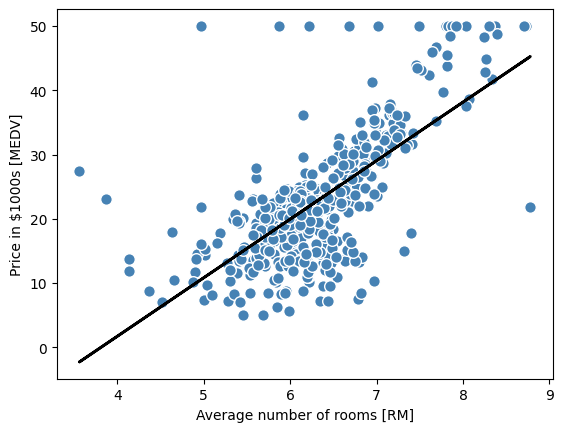

In [ ]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#Solució analítica de la regressió lineal

In [ ]:
Xb = np.hstack((np.ones((X.shape[0],1)),X))

w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T,Xb))
w = np.dot(z, np.dot(Xb.T,y))
print ('Slope: %.3f' % w[1])
print ('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


#RANSAC

In [ ]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_error',
                         residual_threshold=5.0,
                         random_state=0)
ransac.fit(X,y)

RANSACRegressor(estimator=LinearRegression(), min_samples=50, random_state=0,
                residual_threshold=5.0)

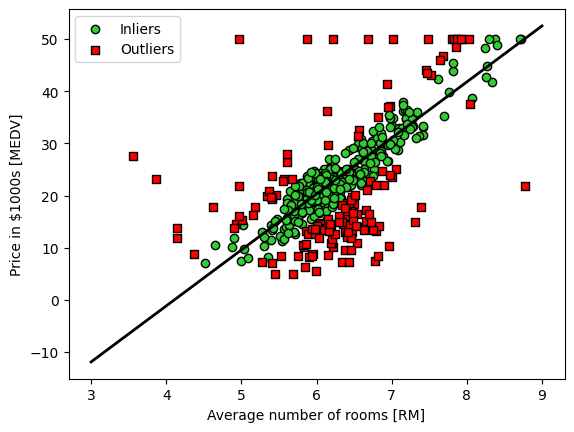

In [ ]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='limegreen', edgecolor='black',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='red', edgecolor='black',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', linewidth=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


#Avaluació
(p334)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

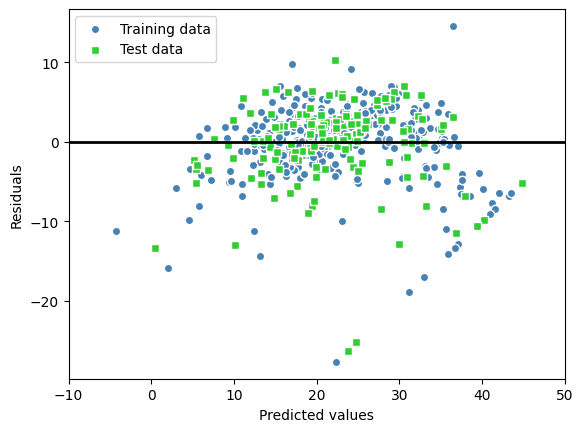

In [ ]:
plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', linewidth=2)
plt.xlim([-10, 50])
plt.show()

Error quadràtic mitjà (MSE) de les prediccions d'entrenament i test

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


Obtenció directa de l'error

In [ ]:
print('MSE train: %.3f, test: %.3f' % (
    np.mean((y_train-y_train_pred)**2),
    np.mean((y_test-y_test_pred)**2)))

MSE train: 19.958, test: 27.196


In [ ]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test %.3f' %
      (r2_score(y_train, y_train_pred),
       r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test 0.673


In [ ]:
1-np.sum((y_train-y_train_pred)**2)/np.sum((y_train-np.mean(y_train))**2)

0.7645451026942548

In [ ]:
1-np.sum((y_test-y_test_pred)**2)/np.sum((y_test-np.mean(y_test))**2)

0.6733825506400171

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [ ]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

#Regressió polinòmica

p340

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.array([258, 270, 294, 320, 342, 368, 396, 446, 480, 586])[:, np.newaxis]
y = np.array([236, 234, 252, 298, 314, 342, 360, 368, 391, 391])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [ ]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:,np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [ ]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

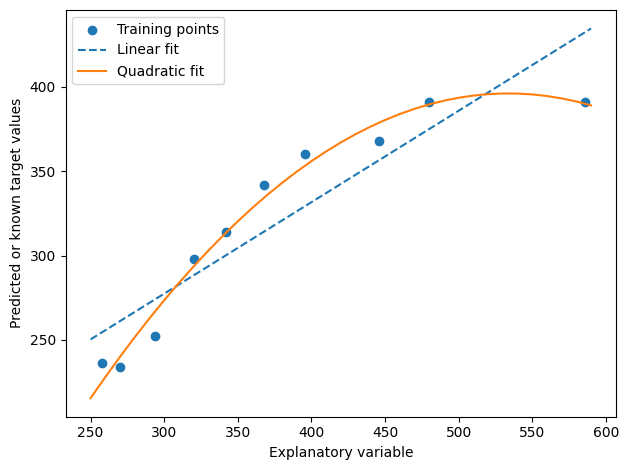

In [ ]:
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f' % (
      mean_squared_error(y, y_lin_pred),
      mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
      r2_score(y, y_lin_pred),
      r2_score(y, y_quad_pred)))

Training MSE linear: 566.897, quadratic: 61.409
Training R^2 linear: 0.833, quadratic: 0.982


#Relacions no lineals en el conjunt de dades Housing

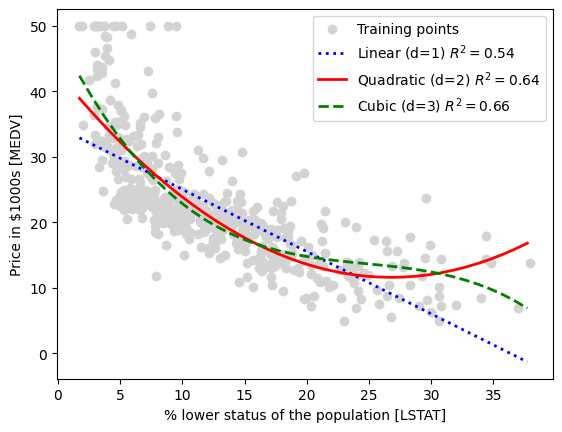

In [ ]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# característiques quadràtiques i cúbiques
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# ajust
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='Linear (d=1) $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label='Quadratic (d=2) $R^2=%.2f$' % quadratic_r2,
         color='red',
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit,
         label='Cubic (d=3) $R^2=%.2f$' % cubic_r2,
         color='green',
         lw=2,
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()


#Transformació logarítmica

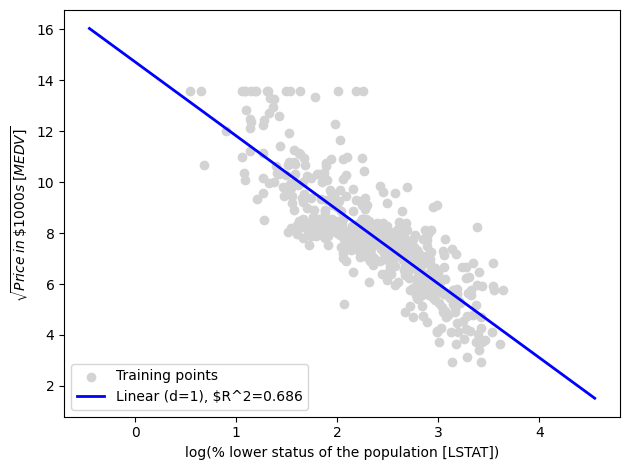

In [ ]:
# transformació logarítmica

X_log=np.log(X)
y_sqrt=(y**(1/1.5))

# ajust

X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:,np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# visualització dels resultats

plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, label='Linear (d=1), $R^2=%.3f' % linear_r2, color='blue', lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Random forests

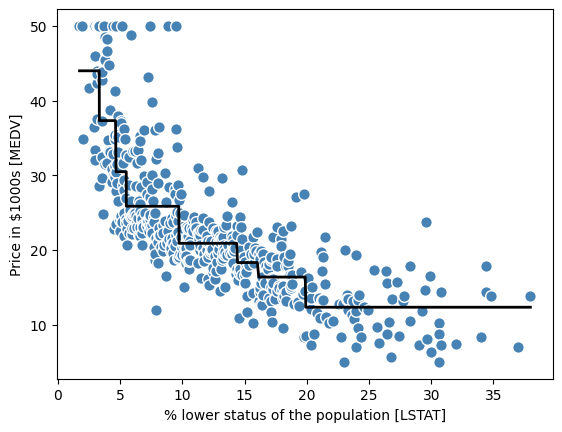

In [ ]:
# Decision tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
#tree = RandomForestRegressor(n_estimators=1000, max_depth=2, criterion='squared_error', random_state=0, n_jobs=1)
#afegir això a l'exemple de Raschka permet veure l'avantatge de fer servir random forests

tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

In [ ]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = \
  train_test_split(X, y,
                   test_size=0.4,
                   random_state=1)

forest = RandomForestRegressor(n_estimators = 8000,
                               criterion='squared_error',
                               max_depth=3,
                               random_state=1,
                               n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.879, test: 0.822


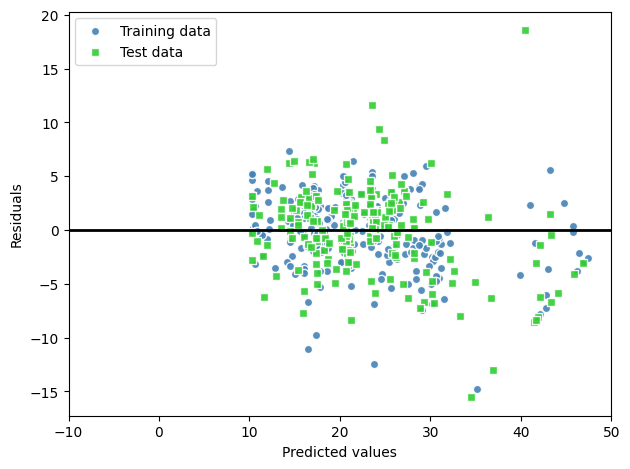

In [ ]:
plt.scatter(y_train_pred,
            y_train_pred - y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training data')
plt.scatter(y_test_pred,
            y_test_pred-y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=35,
            alpha=0.9,
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()


Activitats d'ampliació que es poden fer respecte del llibre de Sebastian Raschka

1. Al decision tree, comparar-ho amb randomforest, en particular 1000 arbres però max_depth2. Superposar els dos gràfics.

2. Al randomforest, obtenir un gràfic que il·lustri el biaix-variança jugant amb el paràmetre max_depth del randomforest.